In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [219]:
# switching to decimal format in pandas, easier to read numbers
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [220]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Deep-learning/data_set/ObesityDataSet_raw_and_data_sinthetic.csv")

In [221]:
# get common statistics and numerical variables
# because it only work with numericals values
# in tis case are 8 nuerical variable
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0
mean,24.3,1.7,86.6,2.4,2.7,2.0,1.0,0.7
std,6.3,0.1,26.2,0.5,0.8,0.6,0.9,0.6
min,14.0,1.4,39.0,1.0,1.0,1.0,0.0,0.0
25%,19.9,1.6,65.5,2.0,2.7,1.6,0.1,0.0
50%,22.8,1.7,83.0,2.4,3.0,2.0,1.0,0.6
75%,26.0,1.8,107.4,3.0,3.0,2.5,1.7,1.0
max,61.0,2.0,173.0,3.0,4.0,3.0,3.0,2.0


In [222]:
#checking wich variables are not number
# also to check how many row and columns
# in this case the requirenment is more than 2000 and this dataset comply it
df.tail(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.7,yes,1.7,0.9,Sometimes,Public_Transportation,Obesity_Type_III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.3,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.1,yes,1.4,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.1,0.6,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.7,Female,1.7,133.5,Sometimes,yes,3.0,3.0,no,no,2.9,yes,1.0,0.7,Sometimes,Public_Transportation,Obesity_Type_III


In [223]:
#chequing duplicated value
df.duplicated().sum()

24

In [224]:
# removing duplicate value
df.drop_duplicates(inplace=True)

In [225]:
#chequing duplicated value again
df.duplicated().sum()

0

In [226]:
# chequing missing value
# i have not in this case
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [227]:
df.describe().columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [228]:
# saving numerical columns to
numerical_columns = df.describe().columns

In [229]:
no_numerical_columns = df.drop(numerical_columns, axis=1)

In [230]:
#checking number of unique value in my no numerical variable wich fuction i will use to process my data
# to know wich one fuction i will use
unique_counts = no_numerical_columns.nunique()

In [231]:
print(unique_counts)

Gender                            2
CALC                              4
FAVC                              2
SCC                               2
SMOKE                             2
family_history_with_overweight    2
CAEC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64


In [232]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [233]:
# label encoder because those columns have only categories and NObeyesdad i will transfor also with label
# encoder to find correlaction but out to apply inverse to use it own labels
from sklearn.preprocessing import LabelEncoder
variables = ["Gender", "FAVC", "SCC", "SMOKE", "family_history_with_overweight"]
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [234]:
# OneHotEncoder because has more than  2 categories
from sklearn.preprocessing import OneHotEncoder
variables = ["CALC", "CAEC", "MTRANS"]

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [235]:
# cheking column to delete the las column when i used my OneHotEncoder as the material explain
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'NObeyesdad', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CAEC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [236]:
# droping no needed  columns using the trick in the material
df.drop(columns=["CALC_no"], inplace=True)
df.drop(columns=["CAEC_no"], inplace=True)
df.drop(columns=["MTRANS_Walking"], inplace=True)

In [237]:
# label encoder because those columns have only categories and NObeyesdad i will transfor also with label
# encoder to find correlaction but out to apply inverse to use it own labels
from sklearn.preprocessing import LabelEncoder
target_variable= ["NObeyesdad"]
encoder = LabelEncoder()
df[target_variable] = df[target_variable].apply(encoder.fit_transform)

In [238]:
 # Cheking wich  variables have more correlation with Weight variable and also
 # wich variables are removables
corr_matrix = df.corr()['NObeyesdad']
corr_matrix.sort_values(ascending=False)

NObeyesdad                        1.0
Weight                            0.4
CAEC_Sometimes                    0.3
family_history_with_overweight    0.3
Age                               0.2
CALC_Sometimes                    0.1
CH2O                              0.1
CALC_Frequently                   0.0
MTRANS_Automobile                 0.0
FAVC                              0.0
Height                            0.0
FCVC                              0.0
Gender                            0.0
MTRANS_Public_Transportation     -0.0
MTRANS_Bike                      -0.0
CALC_Always                      -0.0
SMOKE                            -0.0
MTRANS_Motorbike                 -0.0
SCC                              -0.1
TUE                              -0.1
NCP                              -0.1
CAEC_Always                      -0.1
FAF                              -0.1
CAEC_Frequently                  -0.3
Name: NObeyesdad, dtype: float64

In [239]:
removables = ["CAEC_Frequently", "FAF", "CAEC_Always", "NCP", "TUE", "SCC", "MTRANS_Motorbike", "SMOKE", "CALC_Always", "MTRANS_Bike", "MTRANS_Public_Transportation"    ]

In [240]:
df = df.drop(removables, axis=1)

In [241]:
df.describe()

,Age,Gender,Height,Weight,FAVC,FCVC,CH2O,family_history_with_overweight,NObeyesdad,CALC_Frequently,CALC_Sometimes,CAEC_Sometimes,MTRANS_Automobile
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,24.4,0.5,1.7,86.9,0.9,2.4,2.0,0.8,3.0,0.0,0.7,0.8,0.2
std,6.4,0.5,0.1,26.2,0.3,0.5,0.6,0.4,1.9,0.2,0.5,0.4,0.4
min,14.0,0.0,1.4,39.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.9,0.0,1.6,66.0,1.0,2.0,1.6,1.0,1.0,0.0,0.0,1.0,0.0
50%,22.8,1.0,1.7,83.1,1.0,2.4,2.0,1.0,3.0,0.0,1.0,1.0,0.0
75%,26.0,1.0,1.8,108.0,1.0,3.0,2.5,1.0,5.0,0.0,1.0,1.0,0.0
max,61.0,1.0,2.0,173.0,1.0,3.0,3.0,1.0,6.0,1.0,1.0,1.0,1.0


In [242]:
# in this case i will scale only Age because i will manage Weight fiferenet
num_vars = ["Weight", "Age"]

# MinMaxScaler is the basic scaler. basically: 0 means lowest value in the column
# 1 means highest value in the column. all values will be decimals between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler_with_price = MinMaxScaler()
df[num_vars] = scaler_with_price.fit_transform(df[num_vars])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

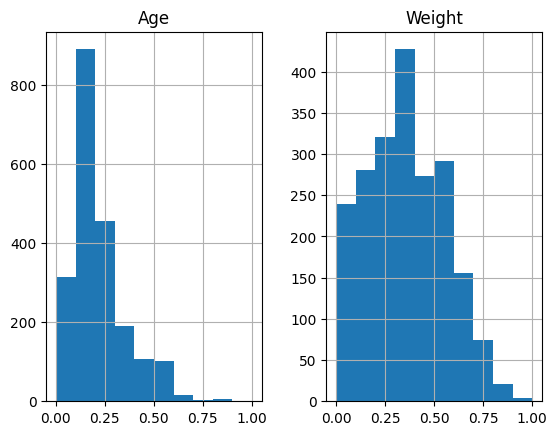

In [243]:
# cheking distribution variable.
df[["Age", "Weight"]].hist()

In [245]:
df[target_variable] = df[target_variable].apply(encoder.inverse_transform)

In [246]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [247]:
# everything else except the target variable
X = df.drop("NObeyesdad", axis=1)

# have only the target variable here (dependent variable)
y_temp = df['NObeyesdad']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [248]:
categories = list(np.unique(df['NObeyesdad']))
print(categories)

['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


In [249]:
# the usual train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [ ]:
training_variable_amount = len(X.columns)

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# this time we only have one
callback_list = [mc]

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1(l=0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_val, y_val), callbacks=callback_list)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 12)                48        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                      

<Axes: >

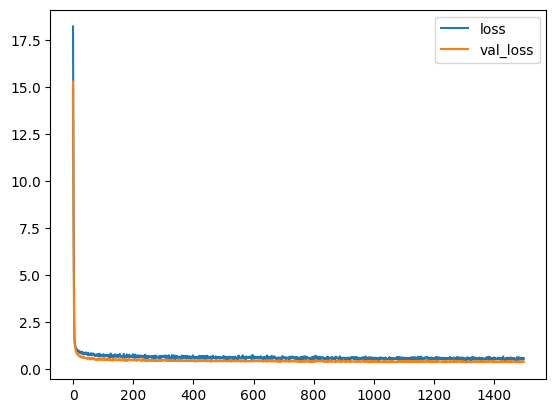

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

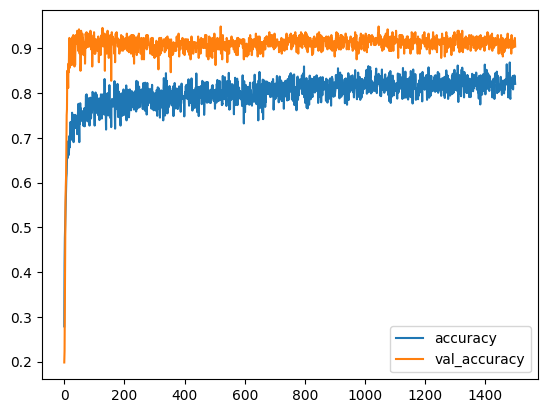

In [64]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [65]:
 # compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.3320317566394806, 0.9299362897872925]

Train data evaluation:
[0.32178837060928345, 0.9178082346916199]


In [66]:
# get predictions and convert with argmax() to get categories
# instead of raw probabilities

# basically we are reverting the cross entropy
# format back to the original target variable format
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

10/10 [==============================] - 0s 2ms/step


<Axes: >

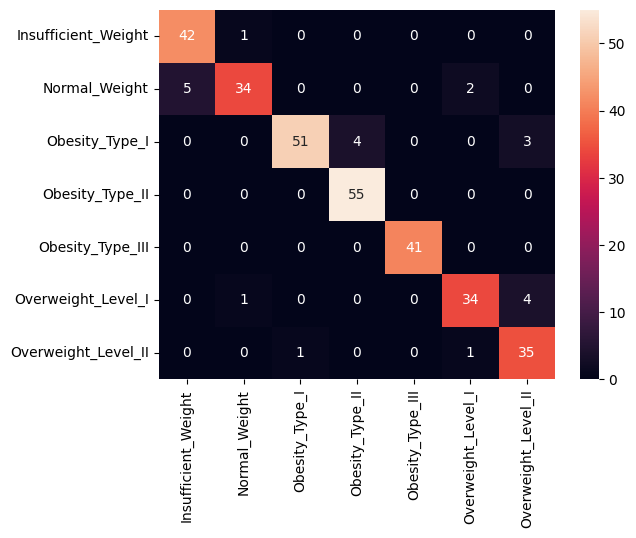

In [67]:
# the original heatmap without label names
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

# you can also use the actual names for the categories
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [68]:
# print the classification report based on true values and predictions
# if you want to use the more human-readable versions of the outcome categories
# use the target_names -parameter
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.94      0.83      0.88        41
           2       0.98      0.88      0.93        58
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        41
           5       0.92      0.87      0.89        39
           6       0.83      0.95      0.89        37

    accuracy                           0.93       314
   macro avg       0.93      0.93      0.93       314
weighted avg       0.93      0.93      0.93       314


Model overall accuracy: 92.99%


In [69]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

66/66 [==============================] - 0s 1ms/step


0.9954832451909922

In [70]:
df.describe()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation
count,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,...,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
mean,24.4,0.5,1.7,86.9,0.9,2.4,2.7,0.0,0.0,2.0,...,0.0,0.0,0.7,0.0,0.1,0.8,0.2,0.0,0.0,0.7
std,6.4,0.5,0.1,26.2,0.3,0.5,0.8,0.2,0.1,0.6,...,0.0,0.2,0.5,0.2,0.3,0.4,0.4,0.1,0.1,0.4
min,14.0,0.0,1.4,39.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.9,0.0,1.6,66.0,1.0,2.0,2.7,0.0,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,22.8,1.0,1.7,83.1,1.0,2.4,3.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
75%,26.0,1.0,1.8,108.0,1.0,3.0,3.0,0.0,0.0,2.5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
max,61.0,1.0,2.0,173.0,1.0,3.0,4.0,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# trying with some new imaginary data
# in this case the variables that have the most impact
# over Weight are marking with *
# and was taken is maximun value

tester_row = {
    'Age': 45,
    'Gender': 1,
    'Height': 1.8,
    'Weight': 0,
    'FAVC': 3, #*
    'FCVC': 3, #*
    'NCP': 4, # *
    'CH2O': 2,
    'family_history_with_overweight': 0,
    'CALC_Sometimes': 1,
    'CAEC_Sometimes': 0,
    'MTRANS_Public_Transportation': 0,
    'NObeyesdad_Obesity_Type_I': 0,
    'NObeyesdad_Obesity_Type_II': 0,
    'NObeyesdad_Obesity_Type_III': 1   # *




}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

# scale our tester row with original scaler
# drop Weight-column after scaling
tester_row[num_vars] = scaler_with_price.transform(tester_row[num_vars])
tester_row = tester_row.drop("Weight", axis=1)

# make a prediction and save the scaled result back into the tester_row
result = model.predict(tester_row)[0]
tester_row["Weight"] = categories[np.argmax(result)]

# final step, inverse transform to get actual values back
tester_row[num_vars] = scaler_with_price.inverse_transform(tester_row[num_vars])
result = tester_row["Weight"]

print()
print(f"Estimated Weight:")
print(result.values[0])
print("----------------")

1/1 [==============================] - 0s 50ms/step

Estimated Weight:
robust
----------------
